In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import torch 
from torch import nn
from torch.autograd import grad 

In [65]:
cpu = torch.device('cpu')
x   = torch.rand(10)
print(x)


tensor([0.2855, 0.1762, 0.4117, 0.5548, 0.3529, 0.4819, 0.9864, 0.8522, 0.0129,
        0.5677])


# One Dimensional x.grad()

In [66]:
def f(x):
    return (x-2)**2

def fp(x):
    return 2*(x-2)

x = torch.tensor([1.0],requires_grad=True)
y = f(x)
y.backward()

print("x",x)
print('analtical f\'(x):',fp(x) )    # 手動算  grad
print("pytorch's 'f\'(x):",x.grad ) #  x.grad()

x tensor([1.], requires_grad=True)
analtical f'(x): tensor([-2.], grad_fn=<MulBackward0>)
pytorch's 'f'(x): tensor([-2.])


# Let's consider a two dimensional differential 
    
    - w = [w1,w2].T
    
    - g(w) = 2w1w2 + w2*cos(w1)  

In [67]:
def g(w):
    return 2* w[0]* w[1] +w[1]*torch.cos(w[0])


w = torch.tensor([np.pi,1],requires_grad=True)
z = g(w)
z.backward()

print("pytorch'f\'(x) :" , w.grad)

pytorch'f'(x) : tensor([2.0000, 5.2832])


iter,	x,	f(x),	f'(x),	f'(x) pytorch
0,	5.000,	9.000,	6.000,	6.000
1,	3.500,	2.250,	3.000,	3.000
2,	2.750,	0.562,	1.500,	1.500
3,	2.375,	0.141,	0.750,	0.750
4,	2.188,	0.035,	0.375,	0.375
5,	2.094,	0.009,	0.188,	0.188
6,	2.047,	0.002,	0.094,	0.094
7,	2.023,	0.001,	0.047,	0.047
8,	2.012,	0.000,	0.023,	0.023
9,	2.006,	0.000,	0.012,	0.012
10,	2.003,	0.000,	0.006,	0.006
11,	2.001,	0.000,	0.003,	0.003
12,	2.001,	0.000,	0.001,	0.001
13,	2.000,	0.000,	0.001,	0.001
14,	2.000,	0.000,	0.000,	0.000


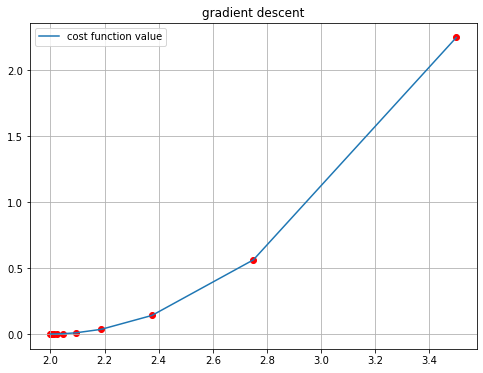

In [68]:
x = torch.tensor([5.0],requires_grad=True)

def f(x):
    return (x-2)**2

def fp(x):
    return 2*(x-2)
    
fig,ax = plt.subplots(figsize=(8,6))
plt.title("gradient descent")
step_size = 0.25 # learning rate

function_value = []
gradient       = []
x_value        = []

print('iter,\tx,\tf(x),\tf\'(x),\tf\'(x) pytorch')


for i in range(15):
    y = f(x)
    y.backward()  # compute the gradient 

    print('{},\t{:.3f},\t{:.3f},\t{:.3f},\t{:.3f}'.format(i,x.item(),f(x).item() ,fp(x).item(),x.grad.item()  ))
    x.data  = x.data - step_size * x.grad 


    function_value.append( f(x).item() )
    x_value.append( x.item() )
    gradient.append(x.grad.item())

    x.grad.detach_()   # --> detach_() is for efficiency
    x.grad.zero_()     # --> zero the grad variable since the backward()

ax.plot(x_value,function_value,label='cost function value')
ax.scatter(x_value,function_value,color='red')
ax.grid()
plt.legend()
plt.show()

# Now Consider a simple Linear Regression

In [101]:
size = (50,2) 
x = torch.randn(size=size)
W = torch.tensor( [[-1.568],[1.5614]] )
y = x @ W  + torch.randn(size=(50,1)) * 0.1

print("data shape        : ",x.shape)
print("prediction shape  : ",y.shape)
print("beta shape        : ",w.shape)


data shape        :  torch.Size([50, 2])
prediction shape  :  torch.Size([50, 1])
beta shape        :  torch.Size([2, 1])


In [102]:
def model(X,w):
    return X @ w 

def rss(y,y_hat):
    return torch.sum ( (y-y_hat)**2 ) / int( y.shape[0] )

def grad_rss(X,y,w):  #--> compute the gradient descent statistically
    return -2*X.t() @ (y- X @ w) / (y.shape[0])

w     = torch.tensor( [[1.0],[0.0]] ,requires_grad=True)
y_hat = model(x,w)
loss  = rss(y,y_hat)
loss.backward()


print("pytorch gradient : ",w.grad.view(2).numpy() )
print("statistical gradeint : ",grad_rss(x,y,w).detach().view(2).numpy())

pytorch gradient :  [ 3.6916094 -3.9877212]
statistical gradeint :  [ 3.6916091 -3.9877222]


- Set initial weight and learning rate

In [103]:
learning_rate = 0.25
w = torch.tensor( [[1.0],[0.0]] ,requires_grad=True)

In [104]:
print('iter\tloss\tw')

for i in range(30):

    y_hat = model(x,w)
    loss  = rss(y,y_hat)
    loss.backward()

    w.data  = w.data - learning_rate * w.grad # (after if we use optimizaer , we don't event need this)


    w.grad.detach()   # --> detach_() is for efficiency
    w.grad.zero_()    # --> zero the grad variable since the backward()

    if i % 5 == 0 :
        print('{}\t{:.3f}\t{}'.format( i ,loss.item() , w.view(2).detach().numpy() ))


print("pytorch estimated w :", w.view(2).detach().numpy() )
print("True W :",W.numpy())

iter	loss	w
0	7.770	[0.07709765 0.9969303 ]
5	0.071	[-1.3527806  1.5497869]
10	0.012	[-1.5233333  1.5356549]
15	0.011	[-1.5448408  1.5330048]
20	0.011	[-1.5475656  1.53266  ]
25	0.011	[-1.5479109  1.5326164]
pytorch estimated w : [-1.5479515  1.5326113]
True W : [[-1.568 ]
 [ 1.5614]]


# Using pytorch.optim (Optimizer)

In [124]:
size = (50,2) 
x = torch.randn(size=size)
W = torch.tensor( [[-1.568],[1.5614]] )
y = x @ W  + torch.randn(size=(50,1)) * 0.1

print("data shape        : ",x.shape)
print("prediction shape  : ",y.shape)
print("beta shape        : ",w.shape)

data shape        :  torch.Size([50, 2])
prediction shape  :  torch.Size([50, 1])
beta shape        :  torch.Size([2, 1])


In [125]:
learning_rate = 0.25

In [126]:
class LinearRegression(nn.Module):
    
    """
    input_dim --> regression features
    """
    
    def __init__(self,input_dim):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim,1)  
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [127]:
model     = LinearRegression(input_dim=2)
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
criterion = nn.MSELoss()

In [138]:
print('iter\tloss\tw')

for i in range(50):

    y_hat = model(x)
    loss  = criterion(y,y_hat)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 5 == 0 :
        print('{}\t{:.3f}\t{}'.format( i ,loss.item() , list(model.parameters())[0].detach() ))


print("pytorch estimated w :", list(model.parameters())[0].detach()  )
print("True W :",W.numpy())

iter	loss	w
0	5.044	tensor([[-0.9389,  0.7387]])
5	0.014	tensor([[-1.5727,  1.4852]])
10	0.008	tensor([[-1.5689,  1.5315]])
15	0.008	tensor([[-1.5667,  1.5370]])
20	0.008	tensor([[-1.5664,  1.5378]])
25	0.008	tensor([[-1.5663,  1.5379]])
30	0.008	tensor([[-1.5663,  1.5379]])
35	0.008	tensor([[-1.5663,  1.5379]])
40	0.008	tensor([[-1.5663,  1.5379]])
45	0.008	tensor([[-1.5663,  1.5379]])
pytorch estimated w : tensor([[-1.5663,  1.5379]])
True W : [[-1.568 ]
 [ 1.5614]]
